# Exercises

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pydataset

from sklearn.model_selection import cross_val_score, GridSearchCV, train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

#remove warnings
import warnings
warnings.filterwarnings("ignore")

### Acquire

In [2]:
cars = pd.read_csv('cars.csv')
cars.columns = [c.lower() for c in cars]
cars.set_index('id', inplace=True)

print('{} rows x {} cols'.format(*cars.shape))
cars.head()

297899 rows x 8 cols


,price,year,mileage,city,state,vin,make,model
id,,,,,,,,
1,16472,2015,18681,Jefferson City,MO,KL4CJBSBXFB267643,Buick,EncoreConvenience
2,15749,2015,27592,Highland,IN,KL4CJASB5FB245057,Buick,EncoreFWD
3,16998,2015,13650,Boone,NC,KL4CJCSB0FB264921,Buick,EncoreLeather
4,15777,2015,25195,New Orleans,LA,KL4CJASB4FB217542,Buick,EncoreFWD
5,16784,2015,22800,Las Vegas,NV,KL4CJBSB3FB166881,Buick,EncoreConvenience


### Prepare

In [3]:
#create column for average price
cars['avg_saleprice'] = cars.groupby(['year', 'make', 'model']).price.transform('mean')

In [4]:
#specify X and y
#X will be numerical 
#y is target variable
X, y = cars[['price', 'mileage', 'year','avg_saleprice']], cars.model

In [5]:
#split data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123)

<hr style="border:2px solid black"> </hr>

# cross_val_score

### Decision Tree Model

In [6]:
#create the model
clf = DecisionTreeClassifier(max_depth=4)
#cv = number of folds
cross_val_score(clf, X_train, y_train, cv=5).mean()

0.10335505662745677

<AxesSubplot:xlabel='depth'>

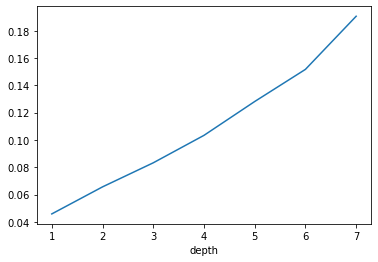

In [7]:
#compare hyperparameters
results = []
for depth in range(1, 8):
    clf = DecisionTreeClassifier(max_depth=depth)
    result = {'depth': depth}
    result['score'] = cross_val_score(clf, X_train, y_train, cv=5).mean()
    results.append(result)

#turn results into a DF and visualize    
pd.DataFrame(results).set_index('depth').score.plot(xticks=range(1, 8))

#this shows you that depth of 7 is best

<hr style="border:1px solid black"> </hr>

#  Grid Search

### KNN Model

In [8]:
#create model
clf = KNeighborsClassifier()

#specify the parameters (all hyperparams in n neighbors, range 1-20)
params = {'n_neighbors': range(1, 8)}

#create a grid search
grid = GridSearchCV(clf, params, cv=5)

#fit the model
grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(1, 8)})

In [9]:
#np array of all mean test scores
grid.cv_results_['mean_test_score']

array([0.18859209, 0.16948045, 0.17164673, 0.17492749, 0.17808741,
       0.17849023, 0.17857527])

In [10]:
grid.cv_results_['params']
# n-1, score 0.189, n-2, score 0.169, etc

[{'n_neighbors': 1},
 {'n_neighbors': 2},
 {'n_neighbors': 3},
 {'n_neighbors': 4},
 {'n_neighbors': 5},
 {'n_neighbors': 6},
 {'n_neighbors': 7}]

In [11]:
#this will tell you n-1 has best score with 0.189
grid.best_score_, grid.best_params_

(0.18859209485245124, {'n_neighbors': 1})

In [12]:
#this only shows best n
grid.best_estimator_

KNeighborsClassifier(n_neighbors=1)

### Takeaways from KNN Model

- best model parameter is n =1 with score of 18.86%

<hr style="border:1px solid black"> </hr>

## Decision Tree Model

In [13]:
#create model
clf = DecisionTreeClassifier()

#identify parameters
params = {'max_depth': range(1, 8), 'min_samples_leaf': range(1, 5)}

#create grid search
grid = GridSearchCV(clf, params, cv=10)

#fit model
grid.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': range(1, 8),
                         'min_samples_leaf': range(1, 5)})

In [14]:
#combine results with params and turn it into Pandas DF
for params, score in zip(grid.cv_results_['params'], grid.cv_results_['mean_test_score']):
    params['score'] = score

In [15]:
#create DF with results of cross validation scores
pd.DataFrame(grid.cv_results_['params']).sort_values(by='score').tail(10)

#best model is max_depth- 7, min_leaf- 4

,max_depth,min_samples_leaf,score
18,5,3,0.127999
19,5,4,0.127999
21,6,2,0.151806
22,6,3,0.151806
23,6,4,0.151806
20,6,1,0.151810
25,7,2,0.190588
24,7,1,0.190588
26,7,3,0.190588
27,7,4,0.190593


### Takeaways from Decision Tree

Best performing hyperparameters:
- max_depth = 7
- min_sample_leaf = 4
- score: 19.06%

<hr style="border:2px solid black"> </hr>

## Custom Scoring

In [16]:
from sklearn.metrics import make_scorer, precision_score, recall_score

#create the model
clf = KNeighborsClassifier(n_neighbors=5)

#change the score to precision
cross_val_score(
    clf, 
    X_train, 
    y_train, 
    scoring=make_scorer(precision_score, pos_label='manual'),
    cv=10
)

array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan])

In [17]:
from sklearn.metrics import make_scorer, precision_score, recall_score

#create the model
clf = KNeighborsClassifier(n_neighbors=5)

#change the score to precision
cross_val_score(
    clf, 
    X_train, 
    y_train, 
    scoring=make_scorer(recall_score, pos_label='manual'),
    cv=10
)

array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan])